# Kaggle: Sberbank - Home price prediction

### Data Understanding & Preparation

#### Training dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno
import numpy as np
import scipy as sp
from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', None) # to diaplay all columns of the dataframe

%matplotlib inline

In [203]:
train_raw = pd.read_csv('train.csv', header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])
test_raw = pd.read_csv('test.csv', header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])

macro_raw = pd.read_csv('macro.csv', header='infer',
                        parse_dates=['timestamp'])

In [ ]:
# merge training and test data set
frames = [train_raw, test_raw]

df = pd.concat(frames)

In [ ]:
# add macro data to train/test data

train_df = pd.merge(train_df, macro_df, how='left', on='timestamp')
test_df = pd.merge(test_df, macro_df, how='left', on='timestamp')

df = pd.merge(df, macro_df, how='left', on='timestamp')

In [3]:
sklearn.preprocessing

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
print train_raw.shape
print test_raw.shape

(30471, 291)
(7662, 290)


In [5]:
train_raw.ndim

2

In [6]:
list(train_raw) # checking column names

['timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekd

In [7]:
# Considering the predictors having high or some correlation with price_doc (from EDA)

vars_subset = ['timestamp', 'full_sq', 'life_sq', 'floor', 
               'max_floor', 'material', 'build_year', 'num_room',
               'kitch_sq', 'state', 'product_type', 'sub_area', 'indust_part', 'school_education_centers_raion', 
               'sport_objects_raion', 'culture_objects_top_25_raion', 'oil_chemistry_raion', 'metro_min_avto',
               'green_zone_km', 'industrial_km', 'kremlin_km', 'radiation_km', 'ts_km', 'fitness_km',
               'stadium_km', 'additional_education_km', 'cafe_count_1500_price_500', 'cafe_count_1500_price_high',
               'cafe_count_2000_price_2500', 'trc_sqm_5000', 'cafe_count_5000', 'cafe_count_5000_price_high',
               'park_km','price_doc']

train_data = train_raw[vars_subset]
test_data = test_raw[vars_subset[:-1]]


In [8]:
train_data.shape

(30471, 34)

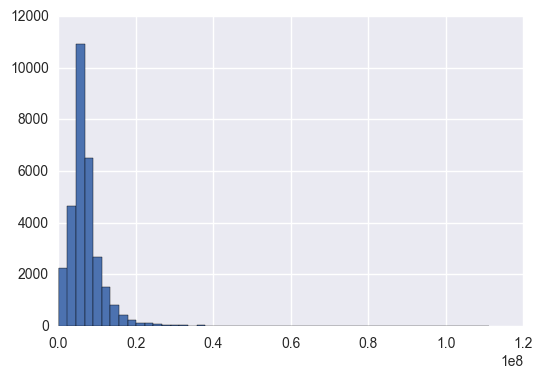

In [9]:
# distribution for price_doc

plt.hist(train_raw['price_doc'], bins=50) ; # ';' to suppress array output, can  do by assigning
                                                            #to a variable as well.


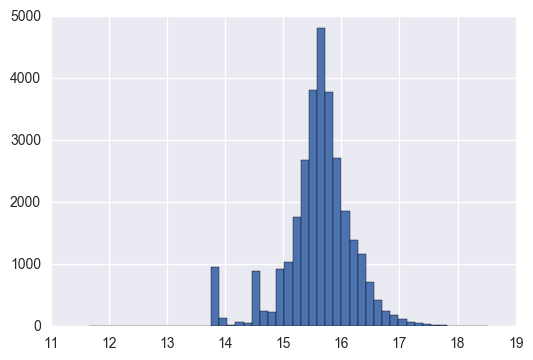

In [10]:
# distribution of log(price_doc+1)

data = train_raw['price_doc']
data_log = np.log(data + 1)

plt.hist(data_log, bins = 50);


In [11]:
# count of missing values by column

train_data.isnull().sum()


timestamp                             0
full_sq                               0
life_sq                            6383
floor                               167
max_floor                          9572
material                           9572
build_year                        13605
num_room                           9572
kitch_sq                           9572
state                             13559
product_type                          0
sub_area                              0
indust_part                           0
school_education_centers_raion        0
sport_objects_raion                   0
culture_objects_top_25_raion          0
oil_chemistry_raion                   0
metro_min_avto                        0
green_zone_km                         0
industrial_km                         0
kremlin_km                            0
radiation_km                          0
ts_km                                 0
fitness_km                            0
stadium_km                            0


In [12]:
test_data.isnull().sum()

timestamp                            0
full_sq                              0
life_sq                           1176
floor                                0
max_floor                            0
material                             0
build_year                        1049
num_room                             0
kitch_sq                             0
state                              694
product_type                        33
sub_area                             0
indust_part                          0
school_education_centers_raion       0
sport_objects_raion                  0
culture_objects_top_25_raion         0
oil_chemistry_raion                  0
metro_min_avto                       0
green_zone_km                        0
industrial_km                        0
kremlin_km                           0
radiation_km                         0
ts_km                                0
fitness_km                           0
stadium_km                           0
additional_education_km  

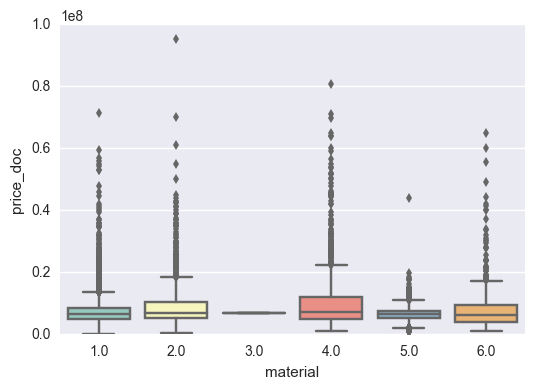

In [13]:
## inspecting 'material' column
#col = 'material'
sns.boxplot(x='material', 
            y='price_doc', 
            data=train_data, 
            palette='Set3')

In [14]:
# check for material = 3

print(train_data['material'].value_counts(dropna=False))
print(test_data['material'].value_counts(dropna=False))

 1.0    14197
NaN      9572
 2.0     2993
 5.0     1561
 4.0     1344
 6.0      803
 3.0        1
Name: material, dtype: int64
1    5241
2     958
4     619
5     487
6     356
3       1
Name: material, dtype: int64


In [15]:
train_data.loc[train_data['material'] == 3]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
24718,2014-11-13,61,NaN,8.0,1.0,3.0,NaN,2.0,10.0,NaN,...,11.446348,3.561084,0,0,0,189076,10,0,3.992569,6931143


In [16]:
test_data.loc[test_data['material'] == 3]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,
36783,2016-03-18,68.0,19.9,1,1,3,1954.0,2,6.1,2.0,...,9.538283,24.177656,2.435459,0,0,0,13000,0,0,12.752709


In [17]:
# Assign to nan as there is only one observation in both train and test sets.

train_data.loc[train_data['material'] == 3, 'material'] = np.nan

test_data.loc[test_data['material'] == 3, 'material'] = np.nan


/Users/romi/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


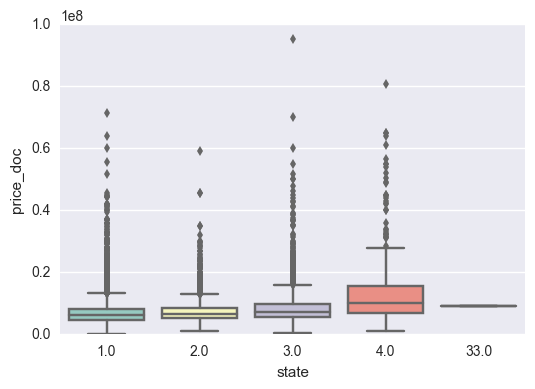

In [18]:
## state
sns.boxplot(x='state', 
            y='price_doc', 
            data=train_data, 
            palette='Set3')

In [19]:
print(train_data['state'].value_counts(dropna=False))
print(test_data['state'].value_counts(dropna=False))

NaN      13559
 2.0      5844
 3.0      5790
 1.0      4855
 4.0       422
 33.0        1
Name: state, dtype: int64
 2.0    2662
 1.0    2266
 3.0    1913
NaN      694
 4.0     127
Name: state, dtype: int64


In [20]:
train_data.loc[train_data['state'] == 33]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
10092,2013-08-27,37,16.0,8.0,12.0,1.0,20052009.0,1.0,9.0,33.0,...,6.296349,0.838386,12,0,9,1804259,409,2,1.394512,9000000


In [21]:
# changing 33 to 3

train_data.loc[train_data['state'] == 33, 'state'] = 3

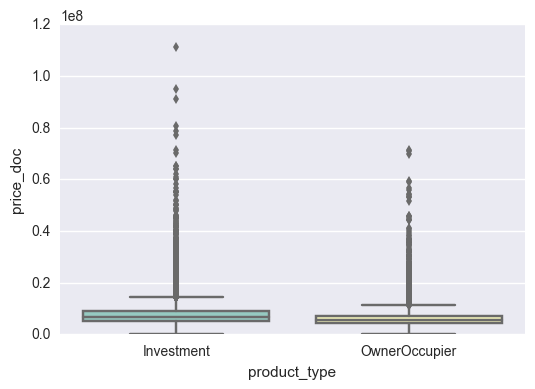

In [22]:
# product_type
sns.boxplot(x='product_type', 
            y='price_doc', 
            data=train_data, 
            palette='Set3')

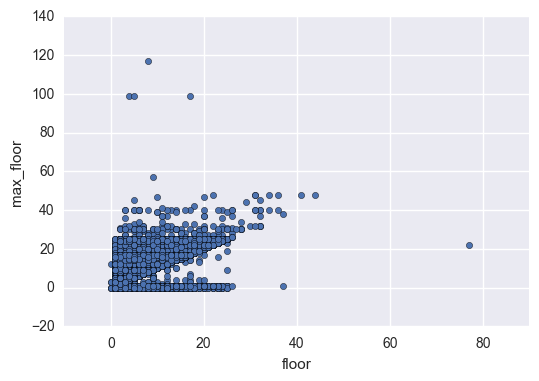

In [23]:
# floor vs max_floor

train_data.plot.scatter(x='floor', y='max_floor')

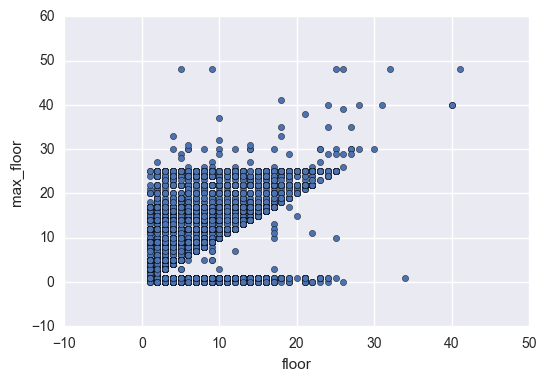

In [24]:
test_data.plot.scatter(x='floor', y='max_floor')

In [26]:
# max_floor (train): removing outliers and fixing erroneous data

train_data.loc[train_data['max_floor'] > 60]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
20725,2014-07-10,47,47.0,4.0,99.0,2.0,NaN,1.0,1.0,NaN,...,0.695292,0.273002,4,0,2,2004469,234,1,1.624049,10238400
21737,2014-08-21,71,71.0,5.0,99.0,6.0,NaN,2.0,9.0,NaN,...,6.847518,1.277151,0,0,0,661050,100,0,2.166759,8484365
21855,2014-08-25,46,46.0,17.0,99.0,6.0,NaN,3.0,9.0,NaN,...,12.628736,4.664301,0,0,0,307076,17,0,4.746198,6670000
25943,2014-12-06,63,63.0,8.0,117.0,1.0,NaN,2.0,1.0,1.0,...,4.018205,0.000000,165,5,150,3346565,2625,26,0.284300,7239838


In [28]:
# max_floor (train): removing outliers and fixing erroneous data

train_data.loc[train_data['max_floor'] == 117, 'max_floor'] = 17
train_data.loc[train_data['max_floor'] > 60, 'max_floor'] = np.nan

In [30]:
# floor (train)
train_data.loc[train_data['floor'] > 60]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
23587,2014-10-15,57,33.0,77.0,22.0,1.0,1986.0,2.0,10.0,3.0,...,3.427904,0.731683,8,1,11,1350002,391,1,0.86354,13700000


In [32]:
# floor (train)
train_data.loc[train_data['floor'] == 77, 'floor'] = 7

In [35]:
# build_year (train)

train_data['build_year'].value_counts(dropna=False).sort_index()

 0.0             530
 1.0             368
 3.0               2
 20.0              1
 71.0              1
 215.0             1
 1691.0            1
 1860.0            2
 1876.0            1
 1886.0            1
 1890.0            5
 1895.0            1
 1896.0            2
 1900.0            2
 1904.0            1
 1905.0            1
 1906.0            1
 1907.0            2
 1910.0            5
 1911.0            1
 1912.0            5
 1914.0            3
 1915.0            5
 1917.0           16
 1920.0            1
 1924.0            3
 1925.0            1
 1926.0            8
 1927.0           10
 1928.0           12
               ...  
 1992.0          139
 1993.0          115
 1994.0          160
 1995.0          149
 1996.0          162
 1997.0          139
 1998.0          141
 1999.0          125
 2000.0          130
 2001.0          177
 2002.0          214
 2003.0          193
 2004.0          220
 2005.0          176
 2006.0          242
 2007.0          219
 2008.0      

In [36]:
train_data.loc[train_data['build_year'] == 20052009, 'build_year'] = 2009
train_data.loc[train_data['build_year'] == 4965, 'build_year'] = 1965
train_data.loc[train_data['build_year'] == 71, 'build_year'] = 1971
train_data.loc[train_data['build_year'] < 1800, 'build_year'] = np.nan

In [38]:
# build_year (test)

test_data['build_year'].value_counts(dropna=False).sort_index()

 0.0        369
 1.0        187
 2.0          1
 215.0        1
 1875.0       1
 1890.0       2
 1895.0       1
 1898.0       1
 1902.0       1
 1905.0       1
 1906.0       1
 1908.0       1
 1910.0       1
 1911.0       3
 1912.0       1
 1914.0       2
 1917.0       3
 1924.0       1
 1926.0       8
 1927.0       3
 1928.0       6
 1929.0       4
 1930.0       3
 1931.0       3
 1932.0       3
 1933.0       1
 1935.0       1
 1937.0       5
 1938.0       3
 1939.0       3
           ... 
 1991.0      28
 1992.0      56
 1993.0      39
 1994.0      49
 1995.0      40
 1996.0      44
 1997.0      58
 1998.0      46
 1999.0      53
 2000.0      56
 2001.0      63
 2002.0      65
 2003.0      61
 2004.0      66
 2005.0      65
 2006.0      92
 2007.0      46
 2008.0      74
 2009.0      58
 2010.0      47
 2011.0      61
 2012.0      74
 2013.0     260
 2014.0     199
 2015.0     259
 2016.0     400
 2017.0     413
 2018.0      30
 2019.0       5
NaN        1049
Name: build_year, Length

In [39]:
test_data.loc[test_data['build_year'] < 1800, 'build_year'] = np.nan

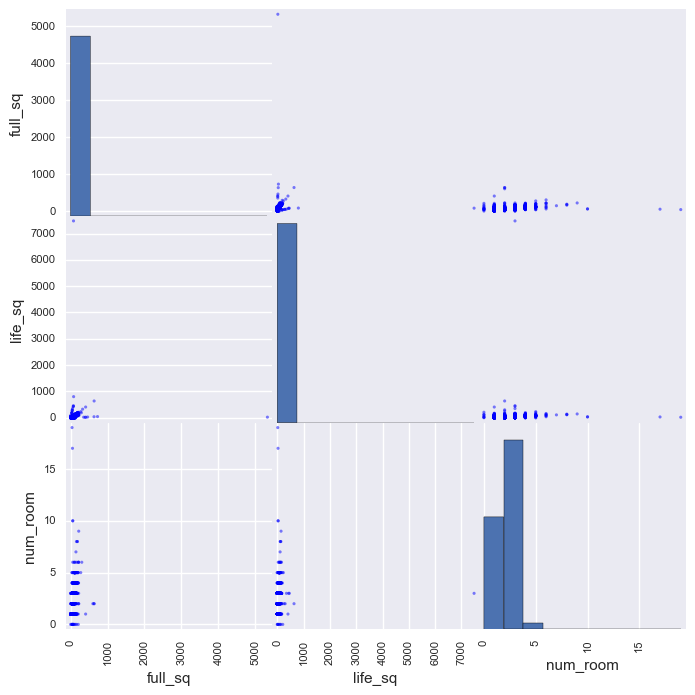

In [45]:
# num_room / full_sq / life_sq (train)

scatter_matrix(train_data.loc[:, ['full_sq', 'life_sq', 'num_room']],
               figsize=(8, 8), 
               diagonal='hist'); 

In [46]:
# full_sq (train)
train_data.loc[train_data['full_sq'] > 300]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
129,2011-10-15,325,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.810541,0.602138,6,0,0,614676,87,0,0.432342,5000000
1481,2012-03-11,353,20.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9.802548,0.505435,1,0,0,331350,29,0,0.509605,4750000
1613,2012-03-21,394,17.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.969276,1.132526,1,0,0,1483860,107,0,1.145993,1050000
2428,2012-06-07,412,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.611333,1.156151,7,0,9,1531229,398,5,0.829386,6117000
2783,2012-07-06,729,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.740085,0.511692,4,0,3,728050,215,1,0.301766,13250000
3530,2012-09-07,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.572132,0.692783,0,0,2,2299621,114,0,1.111874,6868818
3599,2012-09-12,388,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13.430703,1.818087,0,0,0,43437,14,0,3.008939,3899400
5947,2013-02-07,634,38.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10.899425,0.715702,6,0,2,2136111,131,0,0.651078,10200000
7210,2013-04-10,461,27.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.391149,0.588505,0,0,2,1092979,76,0,1.317219,5750000


In [48]:
train_data.loc[train_data['full_sq'] > 1000, 'full_sq'] = train_data.loc[train_data['full_sq'] > 1000, 'full_sq']/100
train_data.loc[train_data['full_sq'] > 310, 'full_sq'] = train_data.loc[train_data['full_sq'] > 310, 'full_sq']/10

In [49]:
# num_room (train)
train_data.loc[train_data['num_room'] > 9]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
11624,2013-10-28,40.0,19.0,17.0,17.0,1.0,2011.0,19.0,7.0,3.0,...,16.005052,3.339685,0,0,0,139300,14,0,6.778371,2630000
17767,2014-04-23,58.0,34.0,1.0,2.0,1.0,1992.0,10.0,10.0,2.0,...,29.304894,1.243631,2,0,0,49700,15,0,17.826048,6000000
26716,2014-12-18,51.0,30.0,14.0,17.0,1.0,1984.0,17.0,8.0,3.0,...,3.675602,0.841009,13,0,8,1172385,365,1,0.640720,13150000
29175,2015-04-16,59.0,33.0,20.0,22.0,1.0,2000.0,10.0,10.0,3.0,...,5.364068,0.665389,7,0,2,1409060,101,0,0.763200,11000000


In [51]:
# num_room (train) : assign nan for all num_rooms > 9
train_data.loc[train_data['num_room'] > 9, 'num_room'] = np.nan

In [52]:
# full_sq vs life_sq

train_data.loc[(train_data['full_sq'] < train_data['life_sq']) & (train_data['life_sq'] > 100)]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
129,2011-10-15,32.5,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.810541,0.602138,6,0,0,614676,87,0,0.432342,5000000
1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.148591,0.947962,14,0,2,4036616,152,0,2.158587,6200000
1866,2012-04-11,30.0,178.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.055364,2.625583,17,0,36,2623000,1498,20,0.675881,5900000
4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.226160,1.185880,21,0,3,1388959,304,0,1.278519,11918400
6339,2013-03-06,37.0,191.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15.779611,0.342897,0,0,0,405046,37,0,0.575474,5400000
7211,2013-04-10,31.0,195.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.247724,1.259800,17,1,9,1829659,415,2,1.258149,6400000
9240,2013-07-16,47.0,301.0,4.0,12.0,1.0,1973.0,2.0,6.0,2.0,...,10.441507,1.105354,2,0,1,1508615,72,0,1.877288,5600000
9259,2013-07-17,77.0,458.0,12.0,16.0,1.0,1996.0,3.0,10.0,3.0,...,8.258239,0.763997,2,0,1,755176,53,0,0.514515,13750000
9649,2013-08-06,82.0,802.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13.933624,0.170194,4,0,1,1139469,80,0,2.122393,12031350


In [53]:
# fix life_sq for 13549
train_data.loc[13549, 'life_sq'] = train_data.loc[13549, 'life_sq'] / 100

In [54]:
# life_sq : adjust for large life_sq and that is greater than full_sq

rows = (train_data['full_sq'] < train_data['life_sq']) & (train_data['life_sq'] > 100)
train_data.loc[rows, 'life_sq'] = train_data.loc[rows, 'life_sq'] / 10

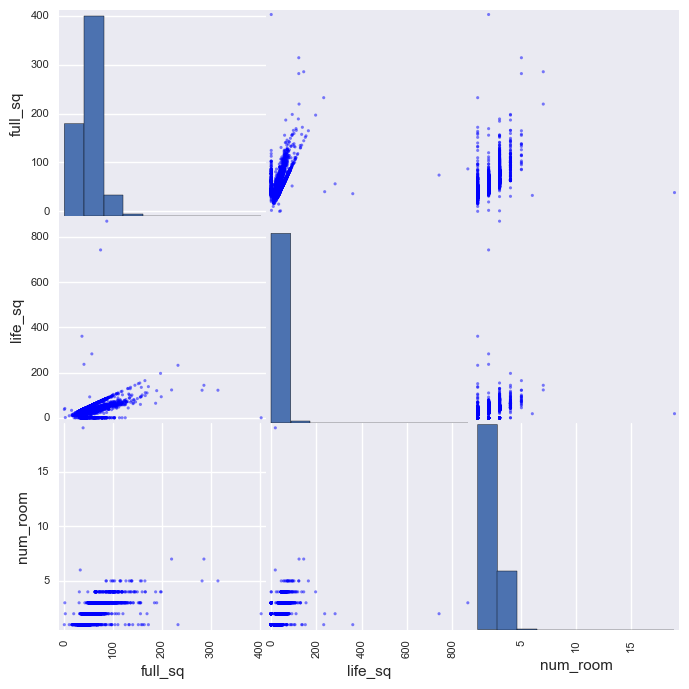

In [55]:
# num_room / full_sq / life_sq (test)
scatter_matrix(test_data.loc[:, ['full_sq', 'life_sq', 'num_room']], 
               figsize=(8, 8), 
               diagonal='hist');

In [56]:
# full_sq (test)

test_data.loc[test_data['full_sq'] > 400, 'full_sq'] = test_data.loc[test_data['full_sq'] > 400, 'full_sq'] / 10

In [57]:
# life_sq (test)
rows = (test_data['full_sq'] < test_data['life_sq']) & (test_data['life_sq'] > 110)
test_data.loc[rows]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,
31075,2015-08-17,74.2,742.0,2,17,1.0,NaN,2,1.0,1.0,...,1.411455,10.862257,3.094514,0,0,0,335876,26,0,3.224569
32370,2015-10-23,36.1,361.0,14,14,4.0,NaN,1,0.0,1.0,...,3.131848,10.853561,2.310648,0,0,0,473076,21,0,3.848776
32505,2015-10-30,40.2,237.0,11,11,1.0,2016.0,2,67.0,1.0,...,0.532986,4.211104,1.419275,0,0,6,2107950,392,4,2.702089
33265,2015-12-01,86.9,869.0,3,20,4.0,NaN,3,0.0,1.0,...,0.510489,14.399796,1.101547,2,0,1,1051069,64,0,1.115083
35661,2016-02-15,56.3,283.0,7,17,1.0,2014.0,2,8.3,2.0,...,0.257317,2.347147,0.270812,19,0,8,1342595,293,0,0.856905


In [58]:
# life_sq (test) : fix for large life_sq and which is greater than full_sq

test_data.loc[rows, 'life_sq'] = test_data.loc[rows, 'life_sq'] / 10

In [59]:
# num_room (test): remove outliers
test_data.loc[test_data['num_room'] > 9, 'num_room'] = np.nan

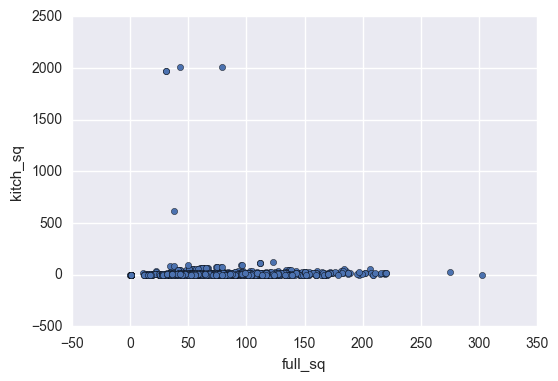

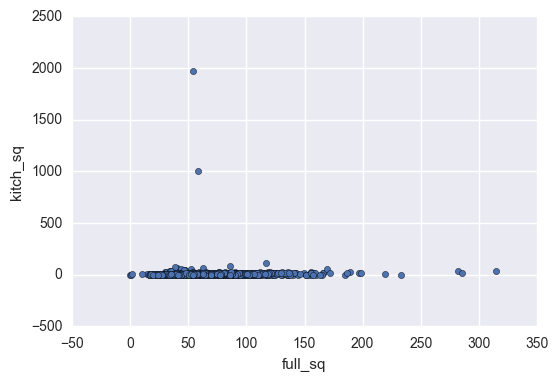

In [63]:
## kitch_sq vs full_sq

train_data.plot.scatter(x='full_sq', y='kitch_sq');
test_data.plot.scatter(x='full_sq', y='kitch_sq');

In [64]:
# Train set : Check for large kitchen_sq and which is larger than full_sq

rows = (train_data['kitch_sq'] > train_data['full_sq']) & (train_data['kitch_sq'] > 100)
train_data.loc[rows]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,
10371,2013-09-10,79.0,41.0,5.0,17.0,6.0,2013.0,3.0,2013.0,1.0,...,22.093400,1.334019,0,0,0,262000,18,0,1.773759,7281225
11523,2013-10-24,38.0,23.0,11.0,14.0,5.0,1971.0,2.0,620.0,2.0,...,4.997441,0.789293,5,0,1,674915,86,0,0.541023,6300000
13120,2013-12-14,31.0,19.0,5.0,1.0,1.0,NaN,1.0,1970.0,3.0,...,2.852763,1.446713,7,0,8,1043695,294,0,2.238930,3650000
21418,2014-08-11,43.0,43.0,3.0,1.0,1.0,2014.0,1.0,2014.0,1.0,...,11.855624,4.183280,0,0,0,189076,12,0,4.194698,3801200
28737,2015-03-31,31.0,16.0,2.0,12.0,5.0,1972.0,1.0,1974.0,3.0,...,29.607725,5.639599,4,0,0,41900,14,0,17.352953,1000000


In [65]:
# train set : Fix for build_year, large kitchen_sq and which is larger than full_sq

train_data.loc[13120, 'build_year'] = 1970 # entered under kitch-sq column
train_data.loc[11523, 'kitch_sq'] = train_data.loc[11523, 'kitch_sq'] / 100
rows = (train_data['kitch_sq'] > train_data['full_sq']) & (train_data['kitch_sq'] > 100)
train_data.loc[rows, 'kitch_sq'] = np.nan 

In [67]:
# test set: Check for large kitchen_sq and which is larger than full_sq

rows2 = (test_data['kitch_sq'] > test_data['full_sq']) & (test_data['kitch_sq'] > 100)
test_data.loc[rows]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,
31381,2015-09-01,53.9,32.1,3,9,1.0,1968.0,2.0,1968.0,2.0,...,0.622248,2.947775,1.674720,1,0,0,3593356,129,0,1.230038
36811,2016-03-19,58.5,58.5,15,17,1.0,2017.0,2.0,1000.0,NaN,...,1.625540,24.171483,0.876534,0,0,2,0,8,0,12.810712


In [68]:
# test set: nan for large kitchen_sq and which is larger than full_sq

test_data.loc[rows2, 'kitch_sq'] = np.nan

In [71]:
# train set: indust_part

train_data['indust_part'].value_counts(dropna = False)

0.000000e+00    1849
7.215758e-02    1776
2.432045e-01    1611
7.122317e-03    1372
7.577876e-02     925
1.764705e-02     713
6.975336e-02     679
7.815280e-05     678
1.615317e-01     518
9.079910e-02     508
3.465608e-02     496
4.111635e-02     451
2.114012e-01     443
3.711490e-01     421
4.378852e-01     410
1.165413e-02     362
3.003225e-01     353
4.963726e-02     327
6.966034e-02     305
1.957811e-01     305
4.112463e-02     301
6.076152e-03     300
1.185374e-01     298
1.332153e-01     297
1.944893e-01     295
1.273759e-01     273
5.090006e-02     268
3.349371e-02     264
1.116274e-01     262
3.094791e-01     255
                ... 
1.501689e-02      94
1.301228e-01      92
5.194206e-02      85
8.761909e-02      85
4.986339e-02      79
4.862456e-01      77
1.747391e-01      72
2.982046e-01      68
2.104732e-01      64
4.230727e-02      60
3.270180e-01      60
8.688527e-02      58
8.194346e-02      56
1.800000e-09      50
4.072762e-01      49
3.627009e-02      44
1.973680e-01 

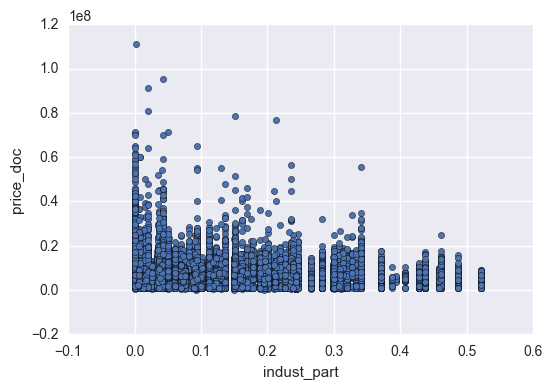

In [70]:
train_data.plot.scatter(x='indust_part', y='price_doc');

In [88]:
pd.set_option('display.max_columns', None) # to display all columns

rows3 = train_data['price_doc'] > 1e8
train_data.loc[rows3]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,2012-05-10,55.0,31.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Teplyj Stan,0.002212,6,3,0,no,1.758636,0.197776,1.881615,14.54756,0.153565,4.184125,0.989694,2.548873,1.284828,6,0,5,1253571,177,0,0.680753,111111112


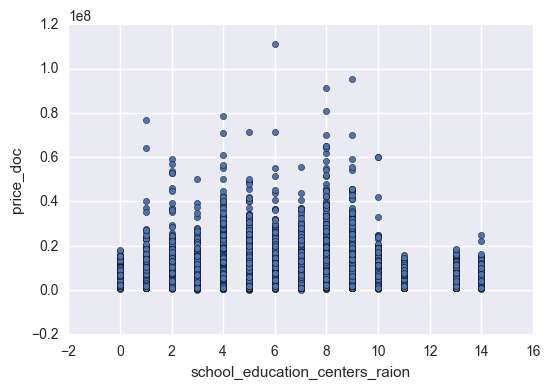

In [89]:
# train set: school_education_centers_raion

train_data.plot.scatter(x='school_education_centers_raion', y='price_doc');

In [101]:
train_data['school_education_centers_raion'].value_counts(dropna = False)

0     6685
5     5747
6     3430
4     3324
7     2526
8     2034
3     1795
9     1219
10     852
2      847
13     748
14     508
1      492
11     264
Name: school_education_centers_raion, dtype: int64

In [96]:
# train set: school_education_centers_raion outlier check

rows4 = (train_data['price_doc'] > 1e8) & (train_data['school_education_centers_raion'] == 6)
train_data.loc[rows4]

# may need to remove this row.

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,2012-05-10,55.0,31.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Teplyj Stan,0.002212,6,3,0,no,1.758636,0.197776,1.881615,14.54756,0.153565,4.184125,0.989694,2.548873,1.284828,6,0,5,1253571,177,0,0.680753,111111112


In [99]:
train_data['sport_objects_raion'].unique()

array([ 7,  6,  5, 17, 25,  4,  3, 29, 12, 16,  2,  0, 10,  1,  8, 13,  9,
       11, 24, 18, 14, 23, 20, 15])

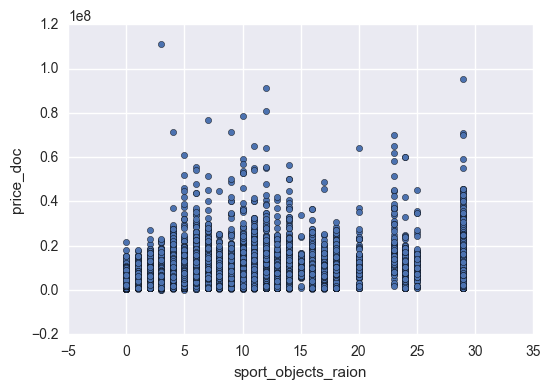

In [100]:
# train : sport_objects_raion
train_data.plot.scatter(x='sport_objects_raion', y='price_doc'); # does not seem to have strong correlation

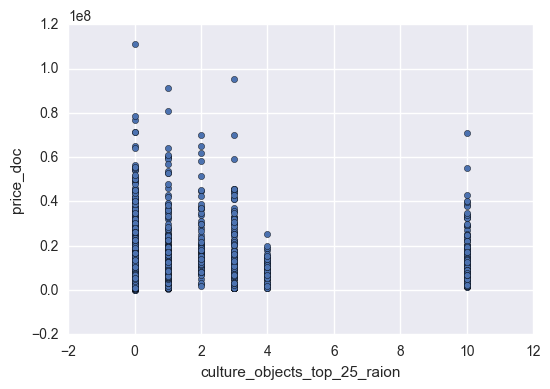

In [102]:
train_data.plot.scatter(x='culture_objects_top_25_raion', y='price_doc');

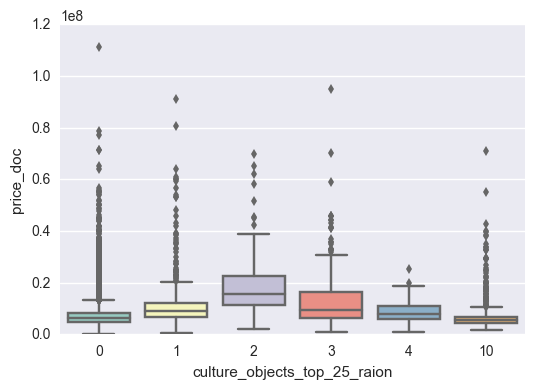

In [104]:
sns.boxplot(x='culture_objects_top_25_raion', 
            y='price_doc', 
            data=train_data, 
            palette='Set3');

KeyError: 'oil_chemistry_raion'

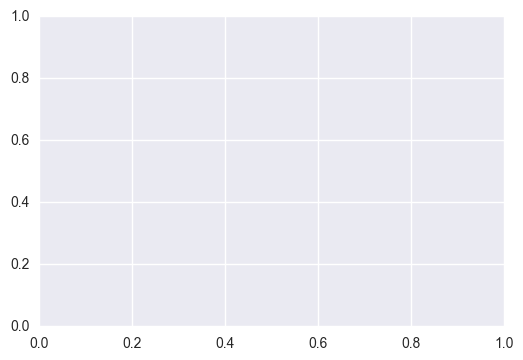

In [109]:


train_data.plot.scatter(x='oil_chemistry_raion', y='price_doc'); # label encoder??

In [118]:
train_data['oil_chemistry_raion'].unique()

array(['no', 'yes'], dtype=object)

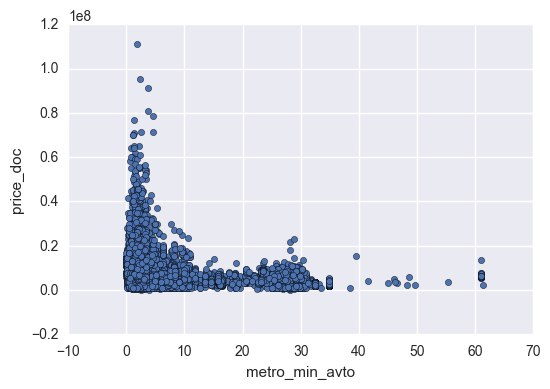

In [110]:
train_data.plot.scatter(x='metro_min_avto', y='price_doc');

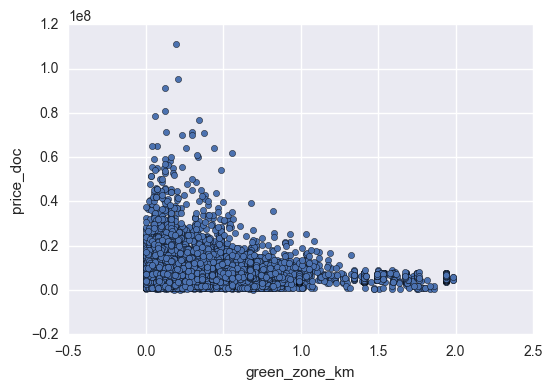

In [111]:
train_data.plot.scatter(x='green_zone_km', y='price_doc');

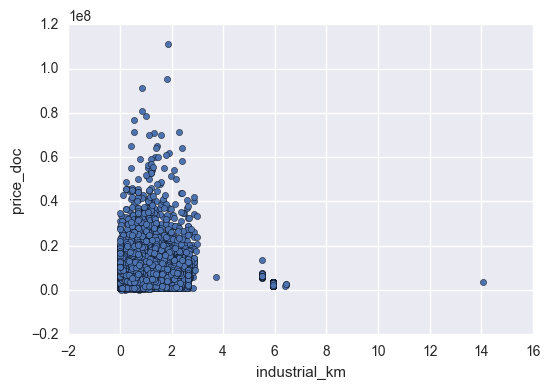

In [112]:
train_data.plot.scatter(x='industrial_km', y='price_doc');

In [115]:
train_data.loc[train_data['industrial_km'] > 14]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11704,2013-10-30,45.0,28.0,3.0,9.0,1.0,1978.0,2.0,6.0,3.0,Investment,Vostochnoe,0.394094,3,0,0,no,30.245262,0.020731,14.048162,30.067316,14.696259,18.006362,3.431665,28.033288,0.173345,0,0,0,0,2,0,14.115759,3700000


In [ ]:
## remove outlier (price_doc)
#train = train.drop(train[train['price_doc'] > 1e8].index)

In [123]:
train_data['life_sq'].isnull().sum()

6383

In [128]:
train_data['full_sq'].mean()

53.86468970496538

In [143]:
train_data.loc[train_data['life_sq'] == 0]



,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
859,2012-01-19,78.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,0.243205,5,0,0,no,2.172488,1.475755,0.134349,19.092643,2.858282,3.925296,2.157173,13.936642,1.951559,0,0,0,54937,17,0,2.252305,552312
1599,2012-03-20,59.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,0.243205,5,0,0,no,1.137442,1.834258,0.565037,19.499810,3.183964,4.203379,2.651193,13.233604,1.933037,0,0,0,54937,15,0,2.745995,338570
2781,2012-07-06,38.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,0.243205,5,0,0,no,2.363303,1.758113,0.745495,19.187280,2.829860,3.814183,2.523632,13.521666,1.777445,0,0,0,54937,21,0,2.615763,675205
3429,2012-08-31,71.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,0.243205,5,0,0,no,2.104965,1.701610,0.775399,19.272537,2.914732,3.896631,2.595748,13.452775,1.734506,0,0,0,54937,21,0,2.688282,1438647
3803,2012-09-24,57.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Poselenie Moskovskij,0.075779,0,3,0,no,8.458554,0.183506,0.238926,23.373697,9.301084,6.009804,1.869427,11.801542,0.594860,0,0,0,139300,14,0,6.520123,5049071
4141,2012-10-10,61.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Tverskoe,0.000078,4,29,10,no,1.482746,0.189089,2.640803,0.072897,0.890001,3.757130,0.269716,4.018205,0.000000,165,5,150,3346565,2625,26,0.284300,4618597
4314,2012-10-22,44.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.808818,0.611910,0.035235,21.528658,3.962859,5.091955,0.784789,13.246408,4.387298,0,0,0,310642,24,0,4.288574,4741970
5882,2013-02-02,61.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Nekrasovka,0.243205,5,0,0,no,0.913144,1.678090,0.754633,19.763938,3.436254,4.441775,2.913977,13.430703,1.818087,0,0,0,43437,14,0,3.008939,5419778
10278,2013-09-04,37.0,0.0,6.0,17.0,1.0,2013.0,1.0,0.0,1.0,OwnerOccupier,Nekrasovka,0.243205,5,0,0,no,4.721045,0.017572,0.394108,20.549464,4.317744,5.013100,2.493236,13.591774,0.203466,0,0,0,44437,16,0,4.616176,3824904


In [148]:
train_data['life_sq'].value_counts()

19.0     2138
30.0     1565
18.0     1544
20.0     1208
28.0     1067
29.0      804
32.0      701
27.0      700
17.0      699
44.0      695
45.0      626
43.0      626
38.0      534
31.0      520
21.0      518
34.0      503
33.0      461
37.0      402
1.0       390
46.0      386
22.0      379
26.0      373
40.0      367
42.0      346
23.0      317
41.0      293
16.0      282
39.0      280
36.0      263
35.0      241
         ... 
143.0       1
19.1        1
145.0       1
40.7        1
80.2        1
130.0       1
174.0       1
43.5        1
172.0       1
232.0       1
109.0       1
209.0       1
30.1        1
63.7        1
45.8        1
32.5        1
147.0       1
150.0       1
17.8        1
148.0       1
133.0       1
167.0       1
189.0       1
179.0       1
111.0       1
34.9        1
136.0       1
176.0       1
19.5        1
25.9        1
Name: life_sq, Length: 176, dtype: int64

In [151]:
## log transformation (train set)
train_data.loc[:, 'log_price_doc'] = np.log(train_data['price_doc'] + 1)

/Users/romi/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [153]:
train_data.shape

(30471, 35)

In [154]:
train_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,0.000070,5,7,0,no,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952
2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,0.049637,8,6,1,no,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270
3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,0.118537,7,5,0,no,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977
4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,0.069753,10,17,0,no,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123
5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,0.037316,9,25,0,no,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603


In [155]:
# save to csv train set
train_data.to_csv('train_cleaned.csv')

In [156]:
# save to csv test set
test_data.to_csv('test_cleaned.csv')

In [8]:
train_data = pd.read_csv('May25_train_cleaned.csv', header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])

In [9]:
train_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952
2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270
3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977
4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123
5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603


In [10]:
len(train_data[train_data['life_sq'] == 0])

45

In [11]:
len(train_data[train_data['full_sq'] == 0])

2

In [12]:
# check rows where full_sq and life_sq bot are 0.

train_data.loc[(train_data['full_sq'] == 0) & (train_data['life_sq'] == 0)] #.reset_index()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
17935,2014-04-28,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,...,1.210613,0,0,0,262000,18,0,1.799915,4425000,15.302781


In [13]:
# drop rows where rows where full_sq and life_sq bot are 0.

train_data.drop(train_data.loc[(train_data['full_sq'] == 0) & (train_data['life_sq'] == 0)].index, inplace=True)

In [14]:
train_data.loc[(train_data['full_sq'] == 0) & (train_data['life_sq'] == 0)]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,


In [15]:
train_data.loc[train_data['life_sq'] == 0]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
859,2012-01-19,78.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.951559,0,0,0,54937,17,0,2.252305,552312,13.221870
1599,2012-03-20,59.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.933037,0,0,0,54937,15,0,2.745995,338570,12.732489
2781,2012-07-06,38.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.777445,0,0,0,54937,21,0,2.615763,675205,13.422773
3429,2012-08-31,71.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.734506,0,0,0,54937,21,0,2.688282,1438647,14.179214
3803,2012-09-24,57.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.594860,0,0,0,139300,14,0,6.520123,5049071,15.434715
4141,2012-10-10,61.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,165,5,150,3346565,2625,26,0.284300,4618597,15.345602
4314,2012-10-22,44.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.387298,0,0,0,310642,24,0,4.288574,4741970,15.371963
5882,2013-02-02,61.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.818087,0,0,0,43437,14,0,3.008939,5419778,15.505566
10278,2013-09-04,37.0,0.0,6.0,17.0,1.0,2013.0,1.0,0.0,1.0,...,0.203466,0,0,0,44437,16,0,4.616176,3824904,15.157044


In [16]:
train_data['life_sq'].median()

30.0

In [17]:
train_data['full_sq'].min()

0.0

In [18]:
lifesq_mean = round(train_data['life_sq'].mean(),1)
lifesq_mean

33.9

In [19]:
train_data.loc[(train_data['life_sq'] == 0) & (train_data['full_sq'] > lifesq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
859,2012-01-19,78.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.951559,0,0,0,54937,17,0,2.252305,552312,13.221870
1599,2012-03-20,59.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.933037,0,0,0,54937,15,0,2.745995,338570,12.732489
2781,2012-07-06,38.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.777445,0,0,0,54937,21,0,2.615763,675205,13.422773
3429,2012-08-31,71.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.734506,0,0,0,54937,21,0,2.688282,1438647,14.179214
3803,2012-09-24,57.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.594860,0,0,0,139300,14,0,6.520123,5049071,15.434715
4141,2012-10-10,61.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,165,5,150,3346565,2625,26,0.284300,4618597,15.345602
4314,2012-10-22,44.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.387298,0,0,0,310642,24,0,4.288574,4741970,15.371963
5882,2013-02-02,61.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.818087,0,0,0,43437,14,0,3.008939,5419778,15.505566
10278,2013-09-04,37.0,0.0,6.0,17.0,1.0,2013.0,1.0,0.0,1.0,...,0.203466,0,0,0,44437,16,0,4.616176,3824904,15.157044


In [20]:
# for full_sq greater than mean of life_sq and life_sq 0

lsq_row1 = (train_data['life_sq'] == 0) & (train_data['full_sq'] > lifesq_mean )
train_data.loc[lsq_row1, 'life_sq'] = round(train_data['life_sq'].mean(),1)

In [21]:
train_data.loc[(train_data['life_sq'] == 0) & (train_data['full_sq'] < lifesq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,


In [22]:
train_data.loc[(train_data['life_sq'].isnull()) & (train_data['full_sq'] > lifesq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
560,2011-12-07,73.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.700373,1,0,0,1139047,247,0,2.637628,10100958,16.128141
625,2011-12-15,110.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.805523,8,0,6,2563253,717,3,2.787659,16118400,16.595472
784,2012-01-12,167.0,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.701970,44,0,54,3693809,2149,22,0.490473,23435712,16.969772
825,2012-01-16,53.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.120915,5,0,3,1344927,181,0,0.412428,8794500,15.989637
835,2012-01-17,81.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.265297,4,0,5,2230614,383,2,0.383190,18668824,16.742366
938,2012-01-26,166.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.872721,8,0,10,1875203,782,6,1.686281,21742504,16.894780
971,2012-01-30,167.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.597668,21,0,9,1280385,338,1,1.672692,18477800,16.732081
981,2012-01-30,123.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.597668,21,0,9,1280385,338,1,1.672692,15719542,16.570415
995,2012-01-31,58.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.660813,1,0,0,1630490,154,0,0.451577,7605000,15.844317


In [23]:
# for full_sq greater than mean of life_sq and life_sq nan

lsq_row2 = (train_data['life_sq'].isnull()) & (train_data['full_sq'] > lifesq_mean )
train_data.loc[lsq_row2, 'life_sq'] = round(train_data['life_sq'].mean(),1)

In [24]:
# full_sq less than mean life_sq

train_data.loc[(train_data['life_sq'].isnull()) & (train_data['full_sq'] < lifesq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
2322,2012-05-30,33.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.471966,0,0,0,252076,13,0,4.448229,3292800,15.007249
3391,2012-08-29,29.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.118928,0,0,0,117300,4,0,10.402779,1885866,14.449898
3738,2012-09-20,22.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.594860,0,0,0,139300,14,0,6.520123,4637566,15.349700
3822,2012-09-25,31.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.471966,0,0,0,252076,13,0,4.448229,3063350,14.935020
3844,2012-09-26,33.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.471966,0,0,0,252076,13,0,4.448229,3309600,15.012338
4056,2012-10-04,27.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.471966,0,0,0,252076,13,0,4.448229,3197000,14.977724
4124,2012-10-09,33.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.207325,0,0,0,473076,22,0,3.803895,3189420,14.975350
4196,2012-10-12,31.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.561084,0,0,0,189076,10,0,3.992569,3142150,14.960418
4627,2012-11-08,32.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.047062,0,0,0,473076,23,0,3.722561,3298560,15.008997


In [25]:
# full_sq less than mean life_sq and life_sq nan

lsq_row3 = (train_data['life_sq'].isnull()) & (train_data['full_sq'] < lifesq_mean )
train_data.loc[lsq_row3, 'life_sq'] = lifesq_mean - 10


In [26]:
train_data.loc[(train_data['life_sq'].isnull()) & (train_data['full_sq'] < lifesq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,


In [27]:
train_data['life_sq'].isnull().sum()

0

In [28]:
len(train_data['max_floor'].isnull())

30470

In [29]:
len(train_data['max_floor'] == 0)

30470

In [30]:
train_data.loc[train_data['max_floor'].isnull()]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952
2,2011-08-23,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270
3,2011-08-27,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977
4,2011-09-01,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123
5,2011-09-05,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603
6,2011-09-06,67.0,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.066285,3,0,2,2010320,567,1,1.073495,9100000,16.023785
7,2011-09-08,25.0,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.273019,12,0,7,1656529,635,3,2.393239,5500000,15.520259
8,2011-09-09,44.0,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.371857,13,0,2,2197401,143,0,1.602056,2000000,14.508658
9,2011-09-10,42.0,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.217477,4,0,1,1051314,292,1,0.939584,5300000,15.483218


In [31]:
maxfloor_rows = train_data['max_floor'].isnull()

train_data.loc[maxfloor_rows, 'max_floor'] = train_data['max_floor'].median()

In [32]:
material_rows = train_data['material'].isnull()

train_data.loc[material_rows, 'material'] = train_data['material'].mode()[0]


In [33]:
len(train_data['num_room'].isnull())

30470

In [34]:
room_rows = train_data['num_room'].isnull()

train_data.loc[room_rows, 'num_room'] = train_data['num_room'].mode()[0]

In [39]:
train_data.head()


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Bibirevo,0.000070,5,7,0,no,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952
2,2011-08-23,34.0,19.0,3.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Nagatinskij Zaton,0.049637,8,6,1,no,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270
3,2011-08-27,43.0,29.0,2.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Tekstil'shhiki,0.118537,7,5,0,no,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977
4,2011-09-01,89.0,50.0,9.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Mitino,0.069753,10,17,0,no,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123
5,2011-09-05,77.0,77.0,4.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Basmannoe,0.037316,9,25,0,no,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603


In [36]:

kitch_rows = train_data['kitch_sq'].isnull()
train_data.loc[kitch_rows, 'kitch_sq'] = round(train_data['kitch_sq'].mean(),0)


In [40]:
train_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Bibirevo,0.000070,5,7,0,no,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952
2,2011-08-23,34.0,19.0,3.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Nagatinskij Zaton,0.049637,8,6,1,no,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270
3,2011-08-27,43.0,29.0,2.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Tekstil'shhiki,0.118537,7,5,0,no,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977
4,2011-09-01,89.0,50.0,9.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Mitino,0.069753,10,17,0,no,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123
5,2011-09-05,77.0,77.0,4.0,12.0,1.0,NaN,2.0,6.0,NaN,Investment,Basmannoe,0.037316,9,25,0,no,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603


In [ ]:
## need to work for build_year and state from reza's xgboost predicted values

#### Test dataset : Missing Imputation

In [42]:
test_data = pd.read_csv('May25_test_cleaned.csv', header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])

In [43]:
test_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30474,2015-07-01,39.0,20.7,2,9,1.0,1998.0,1.0,8.9,3.0,Investment,Juzhnoe Butovo,0.041116,13,13,0,no,1.258957,0.061485,1.205404,24.779082,6.620081,8.824060,0.225788,20.392427,0.514211,0,0,0,299166,19,0,2.048487
30475,2015-07-01,79.2,NaN,8,17,1.0,NaN,3.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,4.230425,0.000000,0.742377,21.722620,8.545593,3.654955,1.313180,13.445121,1.694967,0,0,1,231300,20,0,4.400427
30476,2015-07-01,40.5,25.1,3,5,2.0,1960.0,2.0,4.8,2.0,Investment,Perovo,0.225825,7,13,0,yes,1.585306,0.580638,0.900408,10.320728,0.826743,3.290966,0.966254,1.464174,2.330995,6,0,2,1024431,179,0,2.513006
30477,2015-07-01,62.8,36.0,17,17,1.0,2016.0,2.0,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,0.017647,0,0,0,no,7.931398,0.025446,0.466738,26.960463,9.434351,10.480798,4.480234,18.560234,0.403429,1,0,0,0,5,0,5.612835
30478,2015-07-01,40.0,40.0,17,17,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,2.152792,0.427248,0.353642,21.905792,9.036942,3.729416,1.519553,13.898607,1.339078,0,0,1,201300,20,0,4.566595


In [46]:
test_data.shape

(7662, 33)

In [44]:
len(test_data[test_data['life_sq'] == 0])

4

In [45]:
len(test_data[test_data['full_sq'] == 0])

1

In [50]:
test_data.loc[test_data['full_sq'] == 0]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30938,2015-08-05,0.0,37.8,7,19,1.0,NaN,1.0,0.0,1.0,OwnerOccupier,Poselenie Shherbinka,0.211401,0,0,0,no,13.486605,0.013266,1.164123,28.151572,9.849307,12.349194,2.972129,21.308799,1.404904,1,0,0,175000,7,0,2.088126


In [56]:
# replace 0 full_sq with mode of full_sq

test_data.loc[test_data['full_sq'] == 0, 'full_sq'] = test_data['full_sq'].mode()[0]


In [59]:
lsq_mean = round(test_data['life_sq'].mean(), 1)
lsq_mean

32.3

In [60]:
test_data.loc[(test_data['life_sq'] == 0) & (test_data['full_sq'] > lsq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30968,2015-08-07,37.70,0.0,10,0,1.0,2016.0,1.0,0.0,3.0,OwnerOccupier,Poselenie Shherbinka,0.211401,0,0,0,no,7.288461,0.243880,0.167172,26.833469,8.192339,10.750461,3.594740,18.563395,0.000000,2,0,0,264600,20,0,1.930585
31570,2015-09-11,77.40,0.0,3,0,4.0,2016.0,3.0,0.0,1.0,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,6.894209,0.083869,0.577262,20.092917,5.530838,4.420080,3.234705,10.629170,2.207325,0,0,0,473076,22,0,3.803895
31990,2015-10-01,37.80,0.0,19,19,1.0,2016.0,1.0,0.0,3.0,OwnerOccupier,Poselenie Shherbinka,0.211401,0,0,0,no,13.486605,0.013266,1.164123,28.151572,9.849307,12.349194,2.972129,21.308799,1.404904,1,0,0,175000,7,0,2.088126
37857,2016-04-27,44.35,0.0,3,1,4.0,2017.0,1.0,0.0,1.0,OwnerOccupier,Severnoe,0.197368,2,1,0,no,7.445801,0.316272,1.023528,20.291995,5.439945,8.599167,3.707616,15.661334,0.625829,1,0,0,596067,34,0,2.341011


In [61]:
# for full_sq greater than mean of life_sq and life_sq 0, replace by mean of life_sq

lsq_r1 = (test_data['life_sq'] == 0) & (test_data['full_sq'] > lsq_mean )
test_data.loc[lsq_r1, 'life_sq'] = round(test_data['life_sq'].mean(),1)


In [64]:
test_data.loc[(test_data['life_sq'].isnull()) & (test_data['full_sq'] > lsq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30475,2015-07-01,79.20,NaN,8,17,1.0,NaN,3.0,1.00,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,4.230425,0.000000,0.742377,21.722620,8.545593,3.654955,1.313180,13.445121,1.694967,0,0,1,231300,20,0,4.400427
30479,2015-07-01,48.43,NaN,21,1,1.0,2015.0,1.0,1.00,1.0,OwnerOccupier,Filevskij Park,0.238617,5,18,0,no,3.380114,0.395254,0.000000,6.514713,0.740870,1.377786,0.634820,1.415487,0.858923,3,0,7,2276854,606,12,1.717844
30480,2015-07-01,38.80,NaN,15,17,1.0,NaN,1.0,1.00,1.0,OwnerOccupier,Solncevo,0.371149,5,4,0,no,3.343157,0.360319,0.631064,16.957155,4.687054,0.949480,0.564069,9.073621,0.509985,1,0,0,473050,52,0,0.625673
30481,2015-07-01,43.10,NaN,5,0,1.0,NaN,1.0,0.00,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,6.190648,0.111993,0.084083,20.341546,4.087702,3.921757,1.411455,10.862257,3.094514,0,0,0,335876,26,0,3.224569
30484,2015-07-01,37.26,NaN,4,15,4.0,2017.0,1.0,8.00,1.0,OwnerOccupier,Nagatinskij Zaton,0.049637,8,6,1,no,3.066553,0.674301,0.000000,8.532480,1.939056,2.401257,0.530377,7.735623,0.809436,1,0,1,1920844,178,0,1.372670
30488,2015-07-01,69.30,NaN,7,1,1.0,NaN,2.0,1.00,1.0,OwnerOccupier,Poselenie Filimonkovskoe,0.034656,0,0,0,no,23.237933,0.000000,0.899598,26.097302,11.206799,9.925311,3.470590,18.808850,4.426077,0,0,0,117300,5,0,10.013521
30489,2015-07-02,69.30,NaN,10,0,1.0,NaN,2.0,0.00,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.576081,0.207943,0.678044,20.197090,5.615646,4.473871,3.131848,10.853561,2.310648,0,0,0,473076,21,0,3.848776
30490,2015-07-02,117.40,NaN,10,0,1.0,NaN,3.0,0.00,NaN,OwnerOccupier,Izmajlovo,0.006076,6,16,0,no,1.884632,0.218201,0.544716,10.548745,1.667688,6.751653,0.425490,1.911285,0.442404,8,0,4,568662,167,0,2.126566
30496,2015-07-02,99.88,NaN,4,9,1.0,NaN,3.0,1.00,NaN,OwnerOccupier,Zapadnoe Degunino,0.437885,3,3,0,no,2.894451,0.481168,0.385530,15.869044,0.718146,1.572189,0.989110,9.304031,0.472993,1,0,0,1205497,142,0,0.581199


In [65]:
# for full_sq greater than mean of life_sq and life_sq nan, replace with mean of life_sq

lsq_r2 = (test_data['life_sq'].isnull()) & (test_data['full_sq'] > lsq_mean )
test_data.loc[lsq_r2, 'life_sq'] = round(test_data['life_sq'].mean(),1)

In [67]:
# full_sq less than mean life_sq

test_data.loc[(test_data['life_sq'].isnull()) & (test_data['full_sq'] < lsq_mean )]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30585,2015-07-09,28.05,NaN,5,5,6.0,NaN,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,7.513855,0.474038,0.072578,26.338035,13.672365,8.220437,5.963142,18.202916,3.559321,0,0,0,30000,4,0,9.125228
30681,2015-07-16,27.79,NaN,11,0,1.0,NaN,1.0,0.0,NaN,OwnerOccupier,Poselenie Filimonkovskoe,0.034656,0,0,0,no,16.452974,0.198677,0.166987,28.755365,14.220273,11.946019,5.564268,19.520468,5.178956,0,0,0,0,3,0,12.579504
30857,2015-07-30,26.53,NaN,12,7,6.0,2015.0,1.0,8.0,1.0,OwnerOccupier,Poselenie Filimonkovskoe,0.034656,0,0,0,no,16.143444,0.142927,0.247327,28.738141,14.207390,11.910058,5.541924,19.407725,5.247225,0,0,0,0,3,0,12.535910
30923,2015-08-05,30.31,NaN,4,17,6.0,NaN,1.0,1.0,NaN,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,6.136377,0.354629,0.512255,25.632855,12.879314,7.483016,5.247831,17.217529,4.227457,0,0,0,17000,5,0,8.377818
30979,2015-08-08,28.05,NaN,16,0,1.0,NaN,1.0,0.0,NaN,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,6.136377,0.354629,0.512255,25.632855,12.879314,7.483016,5.247831,17.217529,4.227457,0,0,0,17000,5,0,8.377818
31063,2015-08-15,30.41,NaN,7,1,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,6.146578,0.313823,0.480484,25.608601,12.871096,7.461988,5.223790,17.292763,4.209281,0,0,0,17000,5,0,8.358275
31071,2015-08-15,27.86,NaN,5,0,1.0,NaN,1.0,0.0,NaN,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,6.136377,0.354629,0.512255,25.632855,12.879314,7.483016,5.247831,17.217529,4.227457,0,0,0,17000,5,0,8.377818
31091,2015-08-17,30.15,NaN,2,17,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,Tverskoe,0.000078,4,29,10,no,1.482746,0.189089,2.640803,0.072897,0.890001,3.757130,0.269716,4.018205,0.000000,165,5,150,3346565,2625,26,0.284300
31201,2015-08-22,31.50,NaN,6,0,4.0,NaN,1.0,0.0,NaN,OwnerOccupier,Severnoe,0.197368,2,1,0,no,7.445801,0.316272,1.023528,20.291995,5.439945,8.599167,3.707616,15.661334,0.625829,1,0,0,596067,34,0,2.341011


In [68]:
# full_sq less than mean life_sq and life_sq nan, replace with (mean-10) life_sq 

lsq_r3 = (test_data['life_sq'].isnull()) & (test_data['full_sq'] < lsq_mean )
test_data.loc[lsq_r3, 'life_sq'] = lsq_mean - 10



In [70]:
test_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30474,2015-07-01,39.0,20.7,2,9,1.0,1998.0,1.0,8.9,3.0,Investment,Juzhnoe Butovo,0.041116,13,13,0,no,1.258957,0.061485,1.205404,24.779082,6.620081,8.824060,0.225788,20.392427,0.514211,0,0,0,299166,19,0,2.048487
30475,2015-07-01,79.2,32.3,8,17,1.0,NaN,3.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,4.230425,0.000000,0.742377,21.722620,8.545593,3.654955,1.313180,13.445121,1.694967,0,0,1,231300,20,0,4.400427
30476,2015-07-01,40.5,25.1,3,5,2.0,1960.0,2.0,4.8,2.0,Investment,Perovo,0.225825,7,13,0,yes,1.585306,0.580638,0.900408,10.320728,0.826743,3.290966,0.966254,1.464174,2.330995,6,0,2,1024431,179,0,2.513006
30477,2015-07-01,62.8,36.0,17,17,1.0,2016.0,2.0,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,0.017647,0,0,0,no,7.931398,0.025446,0.466738,26.960463,9.434351,10.480798,4.480234,18.560234,0.403429,1,0,0,0,5,0,5.612835
30478,2015-07-01,40.0,40.0,17,17,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,2.152792,0.427248,0.353642,21.905792,9.036942,3.729416,1.519553,13.898607,1.339078,0,0,1,201300,20,0,4.566595


In [74]:
test_data['material'].isnull().sum()

1

In [80]:
test_data.loc[test_data['max_floor'] == 0]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30481,2015-07-01,43.10,32.30,5,0,1.0,NaN,1.0,0.00,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,6.190648,0.111993,0.084083,20.341546,4.087702,3.921757,1.411455,10.862257,3.094514,0,0,0,335876,26,0,3.224569
30489,2015-07-02,69.30,32.30,10,0,1.0,NaN,2.0,0.00,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.576081,0.207943,0.678044,20.197090,5.615646,4.473871,3.131848,10.853561,2.310648,0,0,0,473076,21,0,3.848776
30490,2015-07-02,117.40,32.30,10,0,1.0,NaN,3.0,0.00,NaN,OwnerOccupier,Izmajlovo,0.006076,6,16,0,no,1.884632,0.218201,0.544716,10.548745,1.667688,6.751653,0.425490,1.911285,0.442404,8,0,4,568662,167,0,2.126566
30542,2015-07-06,34.80,32.30,3,0,1.0,NaN,1.0,0.00,NaN,OwnerOccupier,Poselenie Novofedorovskoe,0.005767,0,0,0,no,32.400256,0.556235,5.910545,51.349687,38.114286,33.214743,7.354662,42.976697,10.474381,0,0,0,0,0,0,16.769467
30546,2015-07-06,41.90,41.90,9,0,1.0,NaN,1.0,1.00,1.0,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,5.586352,0.652140,0.000000,19.225781,4.713749,3.749981,3.703329,9.660386,1.345173,0,0,0,473076,29,0,3.192207
30562,2015-07-07,62.40,32.30,23,0,1.0,NaN,2.0,0.00,NaN,OwnerOccupier,Nagornoe,0.195781,8,2,0,no,0.615890,0.297704,0.000000,8.626076,1.492320,3.004231,0.705647,5.706848,0.616217,5,0,4,2343425,346,2,0.835759
30609,2015-07-10,69.30,32.30,8,0,1.0,NaN,2.0,0.00,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,6.894209,0.083869,0.577262,20.092917,5.530838,4.420080,3.234705,10.629170,2.207325,0,0,0,473076,22,0,3.803895
30640,2015-07-14,49.40,32.30,9,0,1.0,NaN,1.0,0.00,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,6.115405,0.076753,0.087168,20.365972,4.001216,3.927022,1.320652,10.885025,3.188779,0,0,0,335876,26,0,3.231403
30681,2015-07-16,27.79,22.30,11,0,1.0,NaN,1.0,0.00,NaN,OwnerOccupier,Poselenie Filimonkovskoe,0.034656,0,0,0,no,16.452974,0.198677,0.166987,28.755365,14.220273,11.946019,5.564268,19.520468,5.178956,0,0,0,0,3,0,12.579504


In [85]:
test_data['max_floor'].mode()[0]

17

In [86]:
test_data.loc[test_data['max_floor'] == 0, 'max_floor'] = test_data['max_floor'].mode()[0]

In [89]:
np.sum(test_data['material'].isnull())

1

In [92]:
test_data.loc[test_data['material'].isnull(), 'material'] = test_data['material'].mode()[0]

In [96]:
np.sum(test_data['num_room'].isnull())

1

In [97]:
test_data.loc[test_data['num_room'].isnull(), 'num_room'] = test_data['num_room'].mode()[0]

In [98]:
np.sum(test_data['kitch_sq'] == 0)

376

In [100]:
test_data['kitch_sq'].isnull().sum()

2

In [101]:
test_data.loc[test_data['kitch_sq'] == 0, 'kitch_sq'] = test_data['kitch_sq'].mode()[0]

In [102]:
test_data.loc[test_data['kitch_sq'].isnull(), 'kitch_sq'] = test_data['kitch_sq'].mode()[0]

In [105]:
test_data['product_type'].isnull().sum()

33

In [106]:
np.sum(test_data['product_type'] == 0)

0

In [107]:
test_data['product_type'].mode()[0]

'Investment'

In [108]:
test_data.loc[test_data['product_type'].isnull(), 'product_type'] = test_data['product_type'].mode()[0]

#### Fill missing values of 'build_year' and 'state' with the predicted values (using xgboost)

In [124]:
df_imputed = pd.read_csv('cleaned_df_2017-05-26.csv', header='infer', 
                        index_col='id',
                        parse_dates=['timestamp'])

In [125]:
df_imputed.shape

(38133, 453)

In [126]:
df_imputed.head()

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,16_29_female,16_29_male,7_14_all,7_14_female,7_14_male,ID_big_road1,ID_big_road2,ID_bus_terminal,ID_metro,ID_railroad_station_avto,ID_railroad_station_walk,ID_railroad_terminal,additional_education_km,additional_education_raion,area_m,basketball_km,big_church_count_1000,big_church_count_1500,big_church_count_2000,big_church_count_3000,big_church_count_500,big_church_count_5000,big_church_km,big_market_km,big_road1_km,big_road2_km,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,build_count_before_1920,build_count_block,build_count_brick,build_count_foam,build_count_frame,build_count_mix,build_count_monolith,build_count_panel,build_count_slag,build_count_wood,build_year,bulvar_ring_km,bus_terminal_avto_km,cafe_avg_price_1000,cafe_avg_price_1500,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_500,cafe_avg_price_5000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_500,cafe_count_1000_price_high,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_500,cafe_count_2000_price_high,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_500,cafe_count_3000_price_high,cafe_count_500,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_500,cafe_count_5000_price_high,cafe_count_500_na_price,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_500,cafe_count_500_price_high,cafe_sum_1000_max_price_avg,cafe_sum_1000_min_price_avg,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg,cafe_sum_2000_max_price_avg,cafe_sum_2000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_sum_3000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,catering_km,cemetery_km,children_preschool,children_school,church_count_1000,church_count_1500,church_count_2000,church_count_3000,church_count_500,church_count_5000,church_synagogue_km,culture_objects_top_25_raion,detention_facility_km,ekder_all,ekder_female,ekder_male,exhibition_km,female_f,fitness_km,floor,full_all,full_sq,green_part_1000,green_part_1500,green_part_2000,green_part_3000,green_part_500,green_part_5000,green_zone_km,green_zone_part,healthcare_centers_raion,hospice_morgue_km,hospital_beds_raion,ice_rink_km,incineration_km,indust_part,industrial_km,kindergarten_km,kitch_sq,kremlin_km,leisure_count_1000,leisure_count_1500,leisure_count_2000,leisure_count_3000,leisure_count_500,leisure_count_5000,life_sq,male_f,market_count_1000,market_count_1500,market_count_2000,market_count_3000,market_count_500,market_count_5000,market_shop_km,material,max_floor,metro_km_avto,metro_km_walk,metro_min_avto,metro_min_walk,mkad_km,mosque_count_1000,mosque_count_1500,mosque_count_2000,mosque_count_3000,mosque_count_500,mosque_count_5000,mosque_km,museum_km,nuclear_reactor_km,num_room,office_count_1000,office_count_1500,office_count_2000,office_count_3000,office_count_500,office_count_5000,office_km,office_raion,office_sqm_1000,office_sqm_1500,office_sqm_2000,office_sqm_3000,office_sqm_500,office_sqm_5000,oil_chemistry_km,park_km,power_transmission_line_km,preschool_education_centers_raion,preschool_km,preschool_quota,price_doc,prom_part_1000,prom_part_1500,prom_part_20

In [119]:
df_imputed['build_year'].head()

0    1966.506836
1    1962.542969
2    1965.751343
3    1965.646973
4    1953.523315
Name: build_year, dtype: float64

In [120]:
train_data.shape

(30470, 35)

In [122]:
test_data.shape

(7662, 33)

In [123]:
# train + test observations
30470 + 7662

38132

In [ ]:
17935

In [131]:
df_build_year = df_imputed[['build_year']]

In [132]:
df_build_year.shape

(38133, 1)

In [133]:
df_build_year['build_year'].dtype

dtype('float64')

In [134]:
train_data['build_year'].dtype

dtype('float64')

In [136]:
train_data['build_year'].tail()

id
30469    1975.0
30470    1935.0
30471       NaN
30472    2003.0
30473    1968.0
Name: build_year, dtype: float64

In [141]:
df_build_year.loc[30469]

build_year    1975.0
Name: 30469, dtype: float64

In [143]:
df_build_year['build_year'] = df_build_year['build_year'].astype('int')

/Users/romi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [144]:
df_build_year['build_year'].dtype

dtype('int64')

In [145]:
df_build_year.head()

,build_year
id,
1,1966
2,1962
3,1965
4,1965
5,1953


In [146]:
train_data.tail()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30469,2015-06-30,44.0,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,0.300323,4,10,0,no,1.384021,0.139814,0.702853,12.599292,2.371148,1.833401,0.063432,6.769773,0.167718,6,0,2,2548292,207,0,1.972527,7400000,15.816991
30470,2015-06-30,86.0,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,Investment,Tverskoe,0.000078,4,29,10,no,1.060577,0.271861,0.473020,3.269284,1.711271,3.215552,0.398831,2.965732,0.086552,87,2,58,4345915,2197,24,1.036452,25000000,17.034386
30471,2015-06-30,45.0,34.0,10.0,20.0,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,0.007122,0,0,0,no,2.152792,0.427248,0.353642,21.905792,9.036942,3.729416,1.519553,13.898607,1.339078,0,0,1,201300,20,0,4.566595,6970959,15.757264
30472,2015-06-30,64.0,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,Investment,Obruchevskoe,0.093443,8,11,0,no,3.377814,0.227547,2.397723,13.622569,0.718679,3.781523,0.412813,2.374106,1.340017,15,0,9,1464521,230,1,1.772506,13500000,16.418200
30473,2015-06-30,43.0,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,2.0,Investment,Novogireevo,0.038693,4,7,0,no,0.584636,0.559699,0.455194,11.812614,0.999365,1.415294,0.819001,3.641656,0.825811,4,0,1,646575,93,0,0.848766,5600000,15.538277


In [149]:
train_buildYr_imputed = df_build_year[0:30473]

In [150]:
train_buildYr_imputed.tail()

,build_year
id,
30471,2016
30472,2003
30473,1968
30474,1998
30475,2015


In [151]:
train_data.to_csv('May27_dtrain.csv')
test_data.to_csv('May27_dtest.csv')

In [158]:
# get the build_year from df_build_year to train dataset

train_data = pd.merge(train_data, df_build_year, left_index = True, right_index = True, how = 'left')

In [159]:
train_data.shape

(30470, 36)

In [161]:
# drop the build_year_x

train_data.drop('build_year_x', axis=1, inplace=True) # axis = 1 for col, 0 for row


In [164]:
train_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc,build_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,12.0,1.0,2.0,6.0,NaN,Investment,Bibirevo,0.000070,5,7,0,no,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952,1966
2,2011-08-23,34.0,19.0,3.0,12.0,1.0,2.0,6.0,NaN,Investment,Nagatinskij Zaton,0.049637,8,6,1,no,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270,1962
3,2011-08-27,43.0,29.0,2.0,12.0,1.0,2.0,6.0,NaN,Investment,Tekstil'shhiki,0.118537,7,5,0,no,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977,1965
4,2011-09-01,89.0,50.0,9.0,12.0,1.0,2.0,6.0,NaN,Investment,Mitino,0.069753,10,17,0,no,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123,1965
5,2011-09-05,77.0,77.0,4.0,12.0,1.0,2.0,6.0,NaN,Investment,Basmannoe,0.037316,9,25,0,no,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603,1953


In [163]:
# rename build_year_y to build_year

train_data.rename(columns={'build_year_y': 'build_year'}, inplace=True)


In [165]:
# extract the state column

df_state = df_imputed[['state']]


In [166]:
df_state.shape

(38133, 1)

In [168]:
df_state['state'].dtype

dtype('float64')

In [177]:
df_state['state'] = df_state['state'].astype('int')

/Users/romi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [178]:
df_state['state'].head()

id
1    2
2    2
3    2
4    2
5    2
Name: state, dtype: int64

In [179]:
# get the state from df_state onto the train dataset

train_data = pd.merge(train_data, df_state, left_index = True, right_index = True, how = 'left')

In [180]:
train_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state_x,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc,build_year,state_y,state
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,12.0,1.0,2.0,6.0,NaN,Investment,Bibirevo,0.000070,5,7,0,no,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952,1966,2.440874,2
2,2011-08-23,34.0,19.0,3.0,12.0,1.0,2.0,6.0,NaN,Investment,Nagatinskij Zaton,0.049637,8,6,1,no,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270,1962,2.411645,2
3,2011-08-27,43.0,29.0,2.0,12.0,1.0,2.0,6.0,NaN,Investment,Tekstil'shhiki,0.118537,7,5,0,no,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977,1965,2.373770,2
4,2011-09-01,89.0,50.0,9.0,12.0,1.0,2.0,6.0,NaN,Investment,Mitino,0.069753,10,17,0,no,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123,1965,2.591527,2
5,2011-09-05,77.0,77.0,4.0,12.0,1.0,2.0,6.0,NaN,Investment,Basmannoe,0.037316,9,25,0,no,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603,1953,2.501397,2


In [185]:
train_data.loc[train_data['state'] == 33, 'state'] = 3

In [187]:
train_data['state'].unique()

array([2, 1, 3, 0, 4])

In [191]:
train_data.loc[train_data['state'] == 0]

,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state_x,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc,build_year,state_y,state
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2255,2012-05-23,76.0,34.0,3.0,12.0,1.0,2.0,6.0,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.894231,0.909806,0.024063,22.937027,6.588200,6.643051,2.291545,13.014721,3.994802,0,0,1,0,6,0,5.945981,7260855,15.798008,2015,0.919272,0
4737,2012-11-14,34.0,34.0,11.0,12.0,1.0,2.0,6.0,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.418771,0.031696,0.019856,22.624811,5.272402,6.142464,1.119737,13.727039,3.937682,0,0,0,73000,14,0,5.469246,3398250,15.038771,2014,0.953803,0
6976,2013-04-02,65.0,34.0,9.0,12.0,1.0,2.0,6.0,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.418771,0.031696,0.019856,22.624811,5.272402,6.142464,1.119737,13.727039,3.937682,0,0,0,73000,14,0,5.469246,6372900,15.667565,2015,0.956599,0
7249,2013-04-11,39.0,39.0,12.0,12.0,1.0,2.0,6.0,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.418771,0.031696,0.019856,22.624811,5.272402,6.142464,1.119737,13.727039,3.937682,0,0,0,73000,14,0,5.469246,4237200,15.259413,2014,0.991783,0
8369,2013-06-06,85.0,34.0,8.0,22.0,1.0,3.0,0.0,NaN,OwnerOccupier,Poselenie Rjazanovskoe,0.051815,0,1,0,no,17.659790,0.055782,0.982061,32.180037,13.849616,16.385002,1.708027,26.418905,1.709417,0,0,0,179700,3,0,5.820789,7563348,15.838825,2015,0.934277,0
10667,2013-09-23,41.0,34.0,6.0,25.0,1.0,1.0,1.0,NaN,OwnerOccupier,Poselenie Moskovskij,0.075779,0,3,0,no,5.740170,0.463250,0.246759,22.665609,8.454033,5.513752,1.267594,11.688436,0.387398,0,0,0,139300,14,0,6.113916,4274226,15.268114,2015,0.926127,0
10732,2013-09-25,77.0,34.0,2.0,25.0,1.0,3.0,1.0,NaN,OwnerOccupier,Poselenie Moskovskij,0.075779,0,3,0,no,5.740170,0.463250,0.246759,22.665609,8.454033,5.513752,1.267594,11.688436,0.387398,0,0,0,139300,14,0,6.113916,5859033,15.583495,2014,0.926127,0
10901,2013-10-01,41.0,34.0,19.0,25.0,1.0,1.0,1.0,NaN,OwnerOccupier,Poselenie Moskovskij,0.075779,0,3,0,no,5.740170,0.463250,0.246759,22.665609,8.454033,5.513752,1.267594,11.688436,0.387398,0,0,0,139300,14,0,6.113916,3802940,15.151285,2015,0.921250,0
11322,2013-10-17,36.0,34.0,10.0,25.0,1.0,1.0,0.0,NaN,OwnerOccupier,Poselenie Sosenskoe,0.072158,0,1,0,no,7.263895,0.470576,0.118157,21.309021,4.468499,4.840077,0.457578,11.726583,4.120034,0,0,0,189076,12,0,4.151720,3826600,15.157487,2014,0.988497,0


In [192]:
train_data['build_year'].value_counts(dropna=False).sort_index()

3              2
20             1
71             1
215            1
1625           1
1661           1
1664           1
1691           1
1745           1
1746           1
1806           1
1829           4
1850           1
1860           2
1876           1
1886           1
1890           5
1895           2
1896           2
1900           2
1904           1
1905           1
1906           1
1907           2
1910           5
1911           1
1912           6
1914           3
1915           5
1917          16
            ... 
2000         159
2001         207
2002         287
2003         283
2004         298
2005         394
2006         863
2007         501
2008         427
2009         498
2010         344
2011        1022
2012        1151
2013        1080
2014        1800
2015        1437
2016         615
2017         391
2018         244
2019         165
2020          64
2021          21
2022           6
2023           5
2024           2
2025           1
2029           2
2031          

In [193]:
train_data.drop('state_y', axis=1, inplace=True)

In [195]:
train_data.drop('state', axis=1, inplace=True)

In [196]:
train_data.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,num_room,kitch_sq,state_x,product_type,sub_area,indust_part,school_education_centers_raion,sport_objects_raion,culture_objects_top_25_raion,oil_chemistry_raion,metro_min_avto,green_zone_km,industrial_km,kremlin_km,radiation_km,ts_km,fitness_km,stadium_km,additional_education_km,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000_price_2500,trc_sqm_5000,cafe_count_5000,cafe_count_5000_price_high,park_km,price_doc,log_price_doc,build_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43.0,27.0,4.0,12.0,1.0,2.0,6.0,NaN,Investment,Bibirevo,0.000070,5,7,0,no,2.590241,0.600973,1.080934,15.156211,1.210027,4.308127,0.485841,8.148591,0.947962,14,0,2,4036616,152,0,2.158587,5850000,15.581952,1966
2,2011-08-23,34.0,19.0,3.0,12.0,1.0,2.0,6.0,NaN,Investment,Nagatinskij Zaton,0.049637,8,6,1,no,0.936700,0.065321,0.966479,8.698054,2.724295,0.725560,0.668364,6.127073,1.072315,6,0,2,2034942,177,0,0.550690,6000000,15.607270,1962
3,2011-08-27,43.0,29.0,2.0,12.0,1.0,2.0,6.0,NaN,Investment,Tekstil'shhiki,0.118537,7,5,0,no,2.120999,0.453172,0.939275,9.067885,0.772216,3.562188,0.733101,0.767569,0.391957,4,0,1,1572990,122,0,0.374848,5700000,15.555977,1965
4,2011-09-01,89.0,50.0,9.0,12.0,1.0,2.0,6.0,NaN,Investment,Mitino,0.069753,10,17,0,no,1.489049,0.106125,0.451173,19.487005,6.348716,0.583025,0.623484,7.385521,0.892674,5,0,1,942180,61,1,0.078090,13100000,16.388123,1965
5,2011-09-05,77.0,77.0,4.0,12.0,1.0,2.0,6.0,NaN,Investment,Basmannoe,0.037316,9,25,0,no,1.257186,0.236214,0.392871,2.578671,1.638318,2.609420,0.220288,3.610754,0.810801,70,1,50,3503058,2283,17,0.258289,16331452,16.608603,1953


In [198]:
train_data['state_x'].isnull().sum()

13559

In [199]:
df_train_state_null = train_data.loc[train_data['state_x'].isnull()]

In [200]:
df_train_state_null.shape

(13559, 35)

In [202]:
train_data['state_x'].unique()

array([ nan,   3.,   1.,   2.,   4.])

### Macro dataset

In [204]:
macro_raw.shape

(2484, 100)

In [206]:
np.sum(macro_raw.isnull())

timestamp                                        0
oil_urals                                        0
gdp_quart                                       90
gdp_quart_growth                                90
cpi                                             31
ppi                                             31
gdp_deflator                                   365
balance_trade                                   31
balance_trade_growth                            90
usdrub                                           3
eurrub                                           3
brent                                            3
net_capital_export                             396
gdp_annual                                       0
gdp_annual_growth                                0
average_provision_of_build_contract              0
average_provision_of_build_contract_moscow     365
rts                                             10
micex                                           10
micex_rgbi_tr                  

In [209]:
macro_features = ['timestamp', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'ppi', 'gdp_deflator',
                 'gdp_annual', 'gdp_annual_growth', 'mortgage_value', 'mortgage_growth', 'mortgage_rate',
                 'income_per_cap', 'salary', 'labor_force', 'unemployment', 'employment']

macro_data = macro_raw[macro_features]

In [210]:
macro_data.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,gdp_annual,gdp_annual_growth,mortgage_value,mortgage_growth,mortgage_rate,income_per_cap,salary,labor_force,unemployment,employment
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,142968,NaN,13.72,30789.2,38410.5,6436.244,0.018,0.69
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,142968,NaN,13.72,30789.2,38410.5,6436.244,0.018,0.69
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,142968,NaN,13.72,30789.2,38410.5,6436.244,0.018,0.69
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,142968,NaN,13.72,30789.2,38410.5,6436.244,0.018,0.69
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,142968,NaN,13.72,30789.2,38410.5,6436.244,0.018,0.69


In [211]:
macro_data['gdp_quart'].isnull().sum()

90

In [214]:
macro_data['gdp_quart'].mean()

16993.230075187686